#**Business Understanding**

**Mobile Price Klasifikasi**

Bob telah memulai perusahaan selulernya sendiri. Ia ingin memberikan perlawanan keras kepada perusahaan-perusahaan besar seperti Apple, Samsung, dll.

Dia tidak tahu bagaimana memperkirakan harga ponsel yang dibuat oleh perusahaannya. Di pasar ponsel yang kompetitif ini, Anda tidak bisa begitu saja berasumsi. Untuk memecahkan masalah ini, dia mengumpulkan data penjualan ponsel dari berbagai perusahaan.

Bob ingin mengetahui hubungan antara fitur-fitur ponsel (misalnya: RAM, Memori Internal, dll.) dan harga jualnya. Namun, ia tidak begitu ahli dalam Machine Learning. Jadi, ia butuh bantuan Anda untuk memecahkan masalah ini.

**Problem Statements dan Goals**

*   Bagaimana Memprediksi harga sebenarnya tetapi kisaran harga yang menunjukkan seberapa tinggi harganya?
*   Bagaimana mengetahui hubungan antara fitur-fitur ponsel (misalnya: RAM, Memori Internal, dll.) dan harga jualnya?

**Membuat predictive modelling dengan tujuan atau goals sebagai berikut:**

*   Mengetahui fitur-fitur yang berkorelasi dan tidak berkolerasi dengan price_range.
*   Membuat model machine learning yang dapat memprediksi kisaran harga dengan seakurat mungkin berdasarkan fitur-fitur yang ada.

#**Data Understanding**

*   Data loading
*   Exploratory Data Analysis - Deskripsi Variabel
*   Exploratory Data Analysis - Menangani Missing Value dan Outliers
*   Exploratory Data Analysis - Univariate Analysis
*   Exploratory Data Analysis - Multivariate Analysis

###**Load Data**

Sebelum melakukan load data terlebih dahulu menyiapkan library yang dibutuhkan.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

Langkah selanjutnya melakukan pengambilan dataset dari situs kaggle, langkah awal upload token yang dihasilkan dari situs kaggle dengan file kaggle.json.

In [ ]:
# Import module yang disediakan google colab untuk kebutuhan upload file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmadfauzi89","key":"617538c53eb6d803dedb9f525fc54084"}'}

Setelah upload file kaggle.json selanjutnya menghubungkan ke dalam API kaggle untuk pengambilan dataset.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Code dibawah merupakan proses pengambilan dataset pada kaggle dengan link: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

adapun hasil pengambilan akan didownload kedalam google drive dan langsung dilakukan unzip karena data yang terambil akan ber format .zip.

In [ ]:
!kaggle datasets download iabhishekofficial/mobile-price-classification -p "/content/drive/MyDrive/Machine Learning/Latihan Dicoding ML" --unzip

Dataset URL: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
License(s): unknown
  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 5.05MB/s]


Setelah berhasil mendownload data selanjutnya adalah melakukan pembuatan direktory dataset untuk memudahkan pemanggilan data, berikut codenya:

In [ ]:
#Membuat direktory dataset
df_train = pd.read_csv('/content/drive/MyDrive/Machine Learning/Latihan Dicoding ML/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Machine Learning/Latihan Dicoding ML/test.csv')

#Melihat total data train dan test
print(df_train.shape)
print(df_test.shape)

(2000, 21)
(1000, 21)


Berdasarkan direktory data mobile price klasifikasi terdapat dua data yaitu data train dan data test. Total data berjumlah 3000 data dengan rincian sebagai berikut:
*   Data train = 2000 data dengan 21 kolom
*   Data uji = 1000 data dengan 21 kolom

Selanjutnya kita akan lihat isi masing-masing data.



In [ ]:
#Melihat isi data train
df_train.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [ ]:
#Melihat data test
df_test.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

##**Exploratory Data Analysis-Deskripsi Variabel**

**Deskripsi Variabel**

Berdasarkan informasi dari Kaggle, variabel-variabel pada Mobile Price Klasifikasi adalah sebagai berikut:
1.	battery_power: Total energi yang dapat disimpan baterai dalam satu waktu diukur dalam mAh
2.	blue: Memiliki bluetooth atau tidak
3.	clock_speed: kecepatan mikroprosesor mengeksekusi instruksi
4.	dual_sim: Memiliki dukungan dual sim atau tidak
5.	fc: Mega piksel Kamera Depan
6.	four_g: Memiliki 4G atau tidak
7.	int_memory: Memori Internal dalam Gigabyte
8.	m_dep: Kedalaman Seluler dalam cm
9.	mobile_wt: Berat ponsel
10.	n_cores: Jumlah inti prosesor
11.	pc: Mega piksel Kamera Utama
12.	px_height: Tinggi Resolusi Piksel
13.	px_width: Lebar Resolusi Piksel
14.	ram: Memori Akses Acak dalam Mega Byte
15.	sc_h: Tinggi Layar ponsel dalam cm
16.	sc_w: Lebar Layar ponsel dalam cm
17.	talk_time: waktu terlama yang dapat digunakan untuk satu kali pengisian daya baterai
18.	three_g: Memiliki 3G atau tidak
19.	touch_screen: Memiliki layar sentuh atau tidak
20.	wifi: Memiliki wifi atau tidak
21.	price_range: Ini adalah variabel target dengan nilai 0 (biaya rendah), 1 (biaya sedang), 2 (biaya tinggi) dan 3 (biaya sangat tinggi).

sebagai informasi tambahan untuk kolom atau variabel antara data train dan test memiliki variabel yang sama hanya saja pada data test tidak ada variabel price_range dan diganti menjadi variabel ID.

In [ ]:
#Melihat type data train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Berdasarkan hasil diatas dapat diketahui bahwa type data pada data train memilki 2 type data yaitu float dan int dimana variabel clock_speed dan m_dep bertipe data float dan sisanya bertipe data int.

selanjutnya akan melihat deskripsi statistik data train.

In [ ]:
#Melihat deskripsi statistik data trian.
df_train.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

##**Exploratory Data Analysis - Melihat Missing Value dan Outliers**
Selain melihat deskripsi statistik data kita juga bisa melihat missing value dari dataset train.

In [ ]:
#Melihat Missing value data train
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Hasil diatas menunjukkan bahwa dataset pada data train tidak memiliki data missing atau data hilang, langkah selanjutnya adalah melihat outlier pada data train.

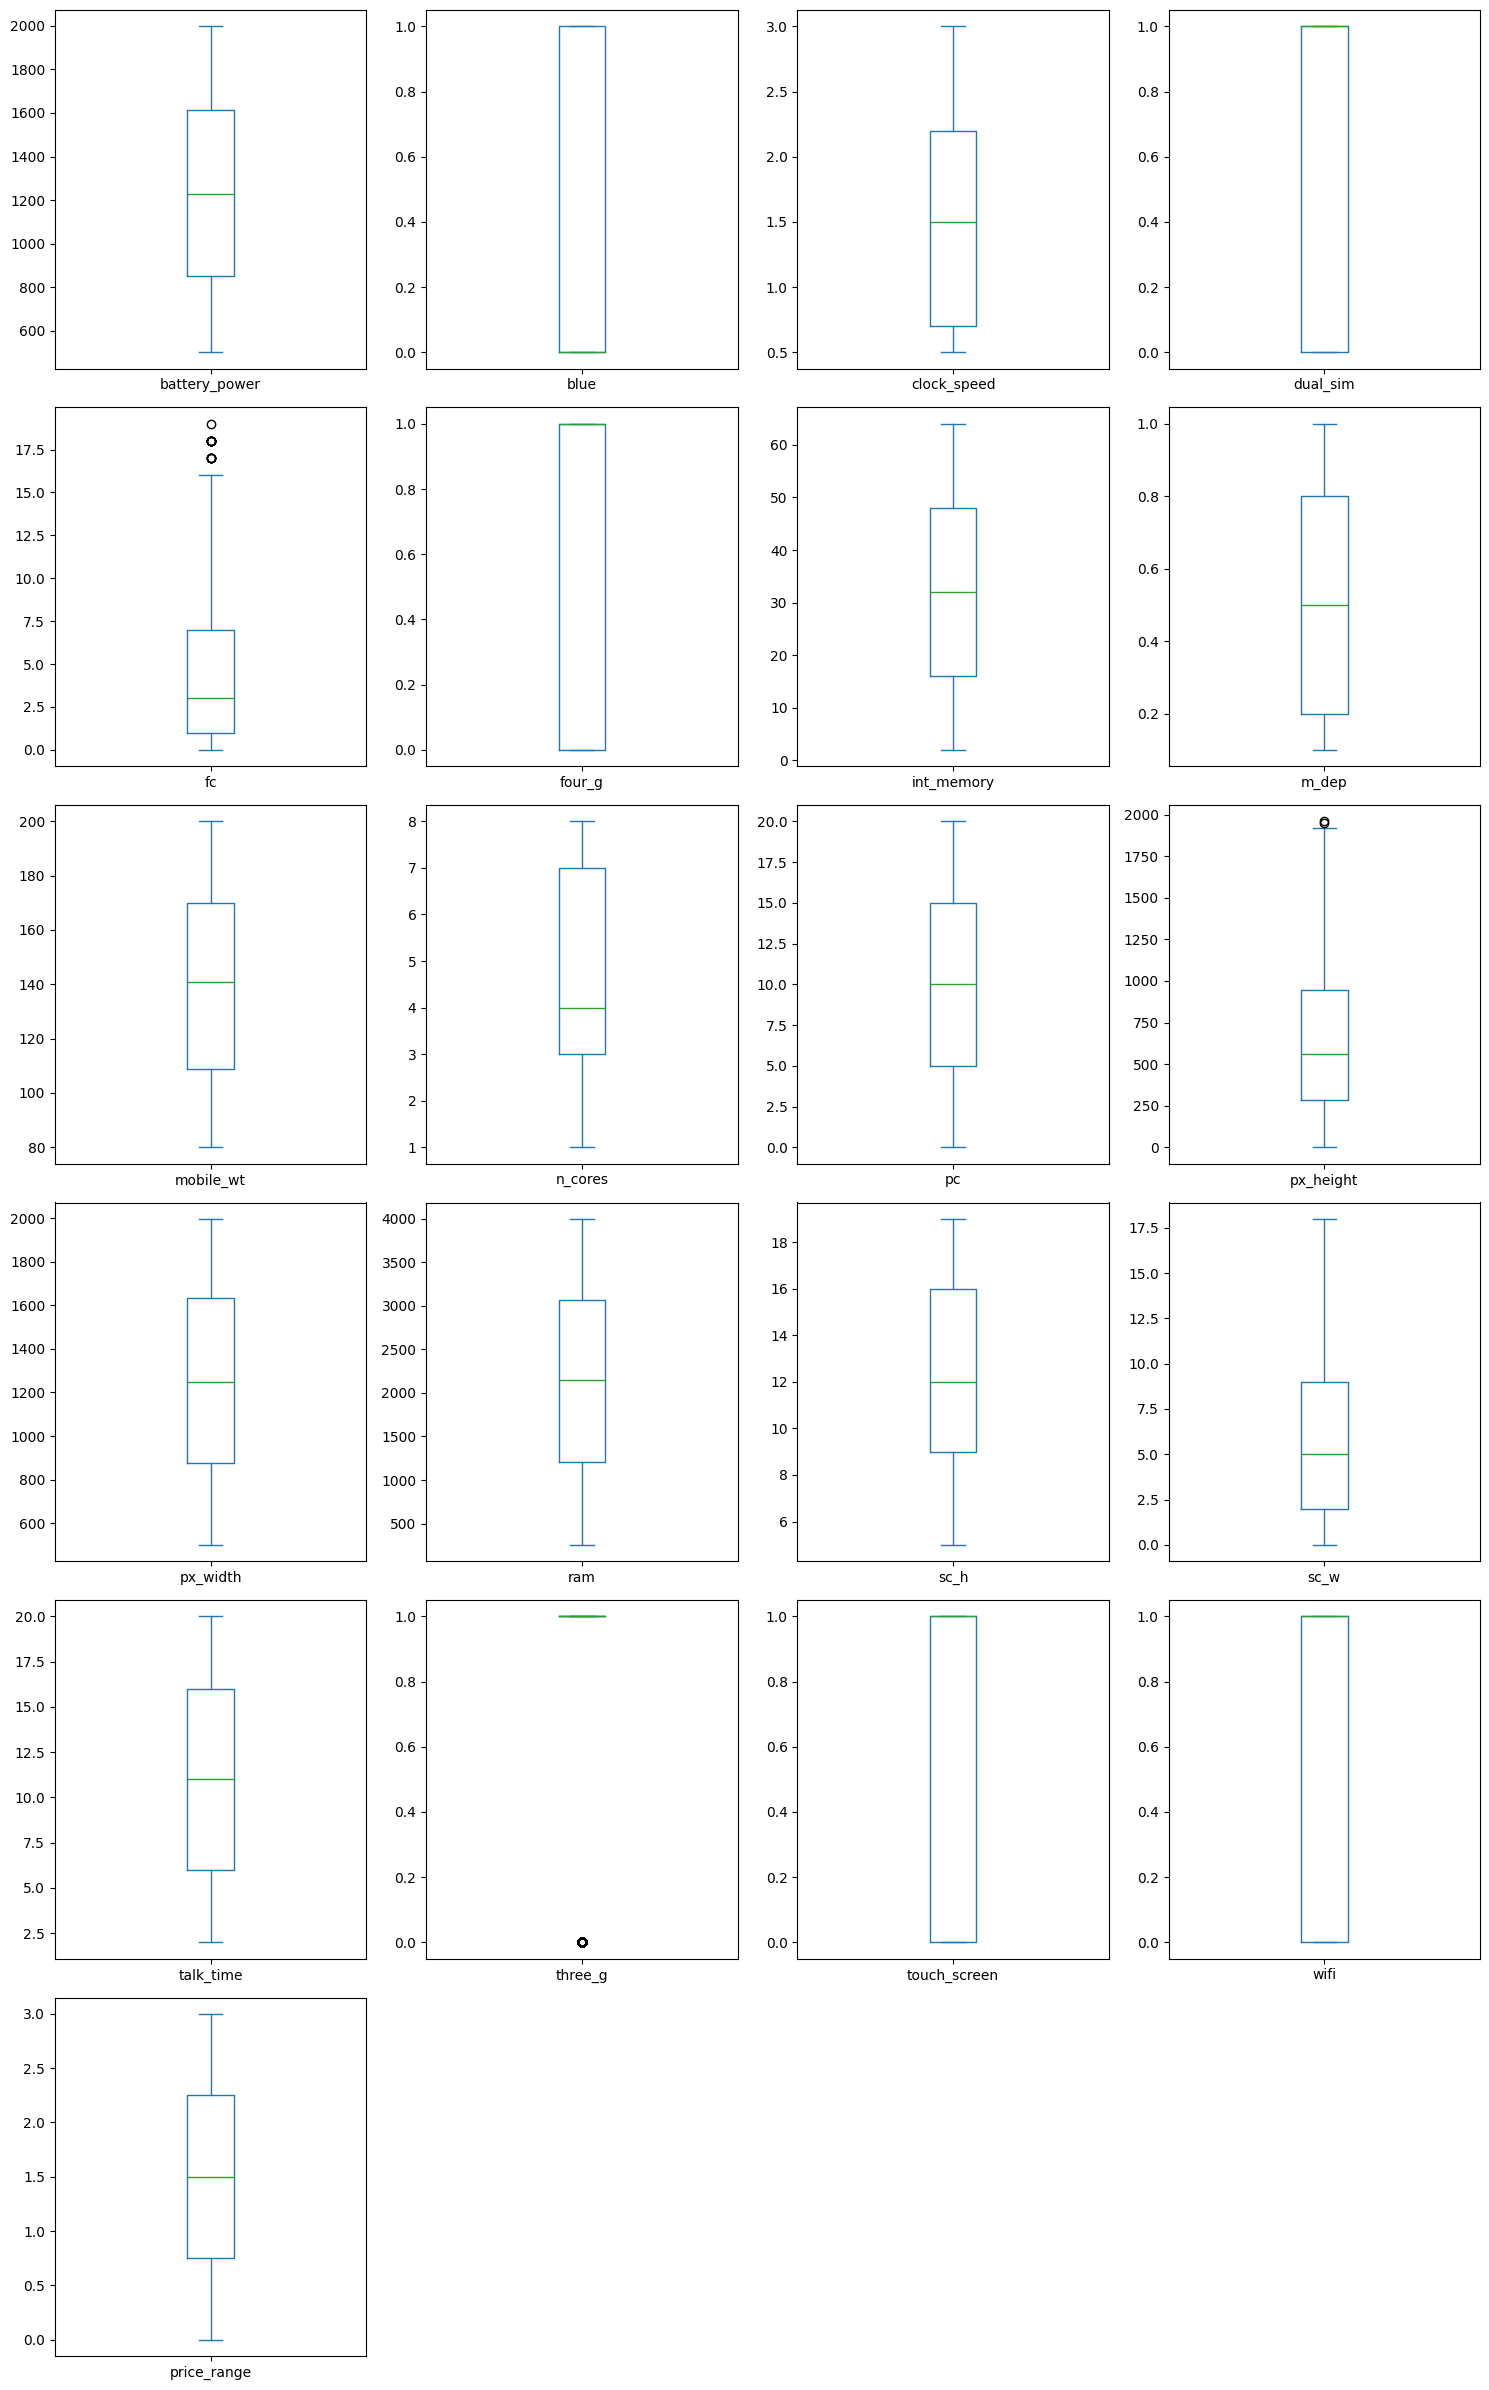

In [ ]:
#Melihat data outlier dengan visualisasi boxplot
num_cols = len(df_train.columns)
num_rows = (num_cols + 3) // 4  # Calculate rows needed, ensuring at least 1
df_train.plot(kind='box', subplots=True, layout=(num_rows, 4), figsize=(15, num_rows * 4))  # Adjust figsize for better visualization
plt.tight_layout()  # Add this line to prevent overlapping of subplots
plt.show()

Setelah kita melihat data outlier dan terlihat pesebaran data cukup baik, selanjutnya melakukan visualisasi diagram bar untuk mengetahui penyebaran atau jumlah data pada masing-masing variabel.

##**Exploratory Data Analysis - Univariate Analysis**
Dalam langkah ini saya ingin melihat persebaran data pada seluruh variabel dan melihat persebaran data pada masing-masing variabel.

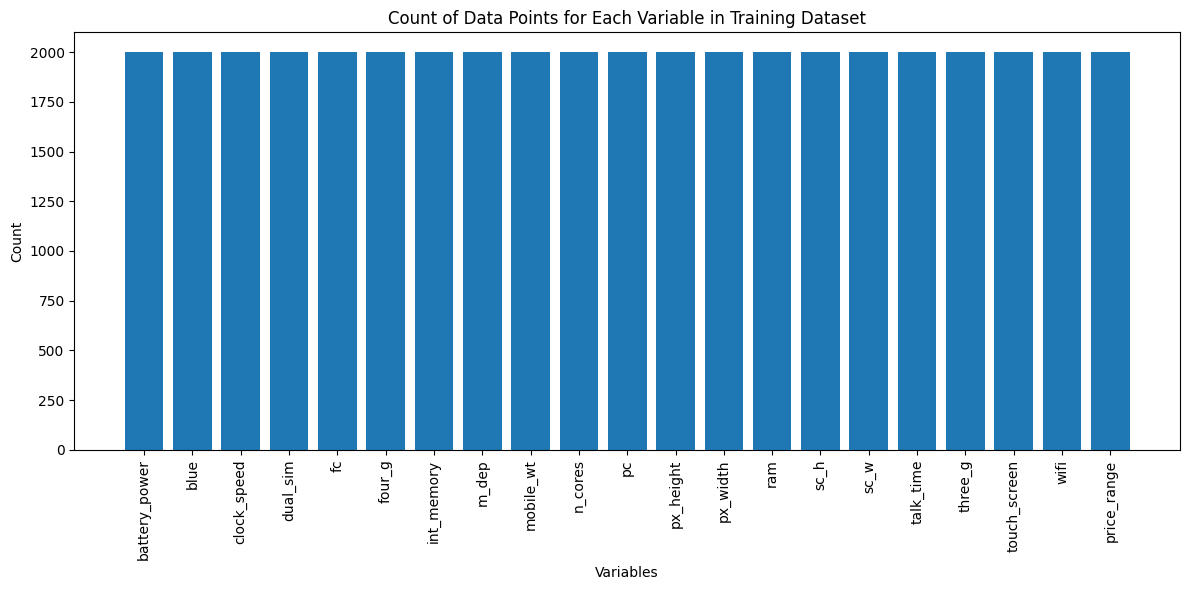

In [ ]:
#Melihat jumlah data pada setiap variabel data train dengan visualisasi diagram bar
# Calculate the count of data points for each variable
variable_counts = df_train.count()

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.bar(variable_counts.index, variable_counts.values)
plt.xlabel("Variables")
plt.ylabel("Count")
plt.title("Count of Data Points for Each Variable in Training Dataset")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**Melihat penyebaran atau jumlah data pada masing-masing variabel data train.**

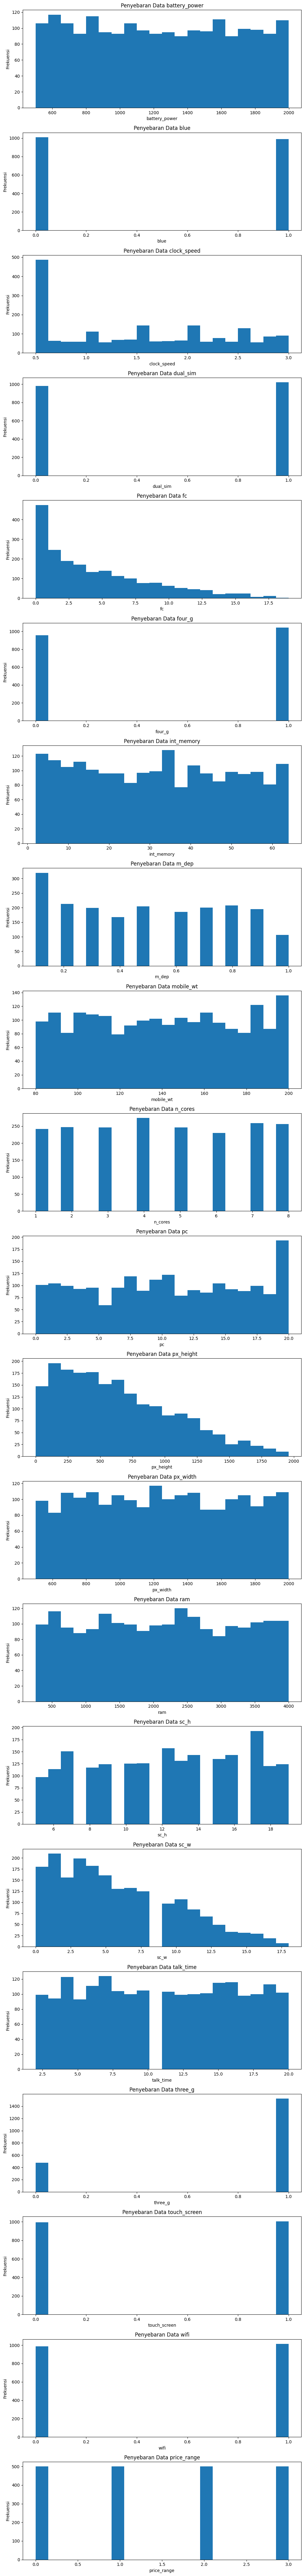

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ambil semua kolom numerik
numeric_cols = df_train.select_dtypes(include=np.number).columns.tolist()

# Buat histogram terpisah untuk setiap kolom
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, 4*len(numeric_cols)))

for i, col in enumerate(numeric_cols):
  axes[i].hist(df_train[col], bins=20) # Anda dapat menyesuaikan jumlah bins sesuai kebutuhan
  axes[i].set_title(f'Penyebaran Data {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

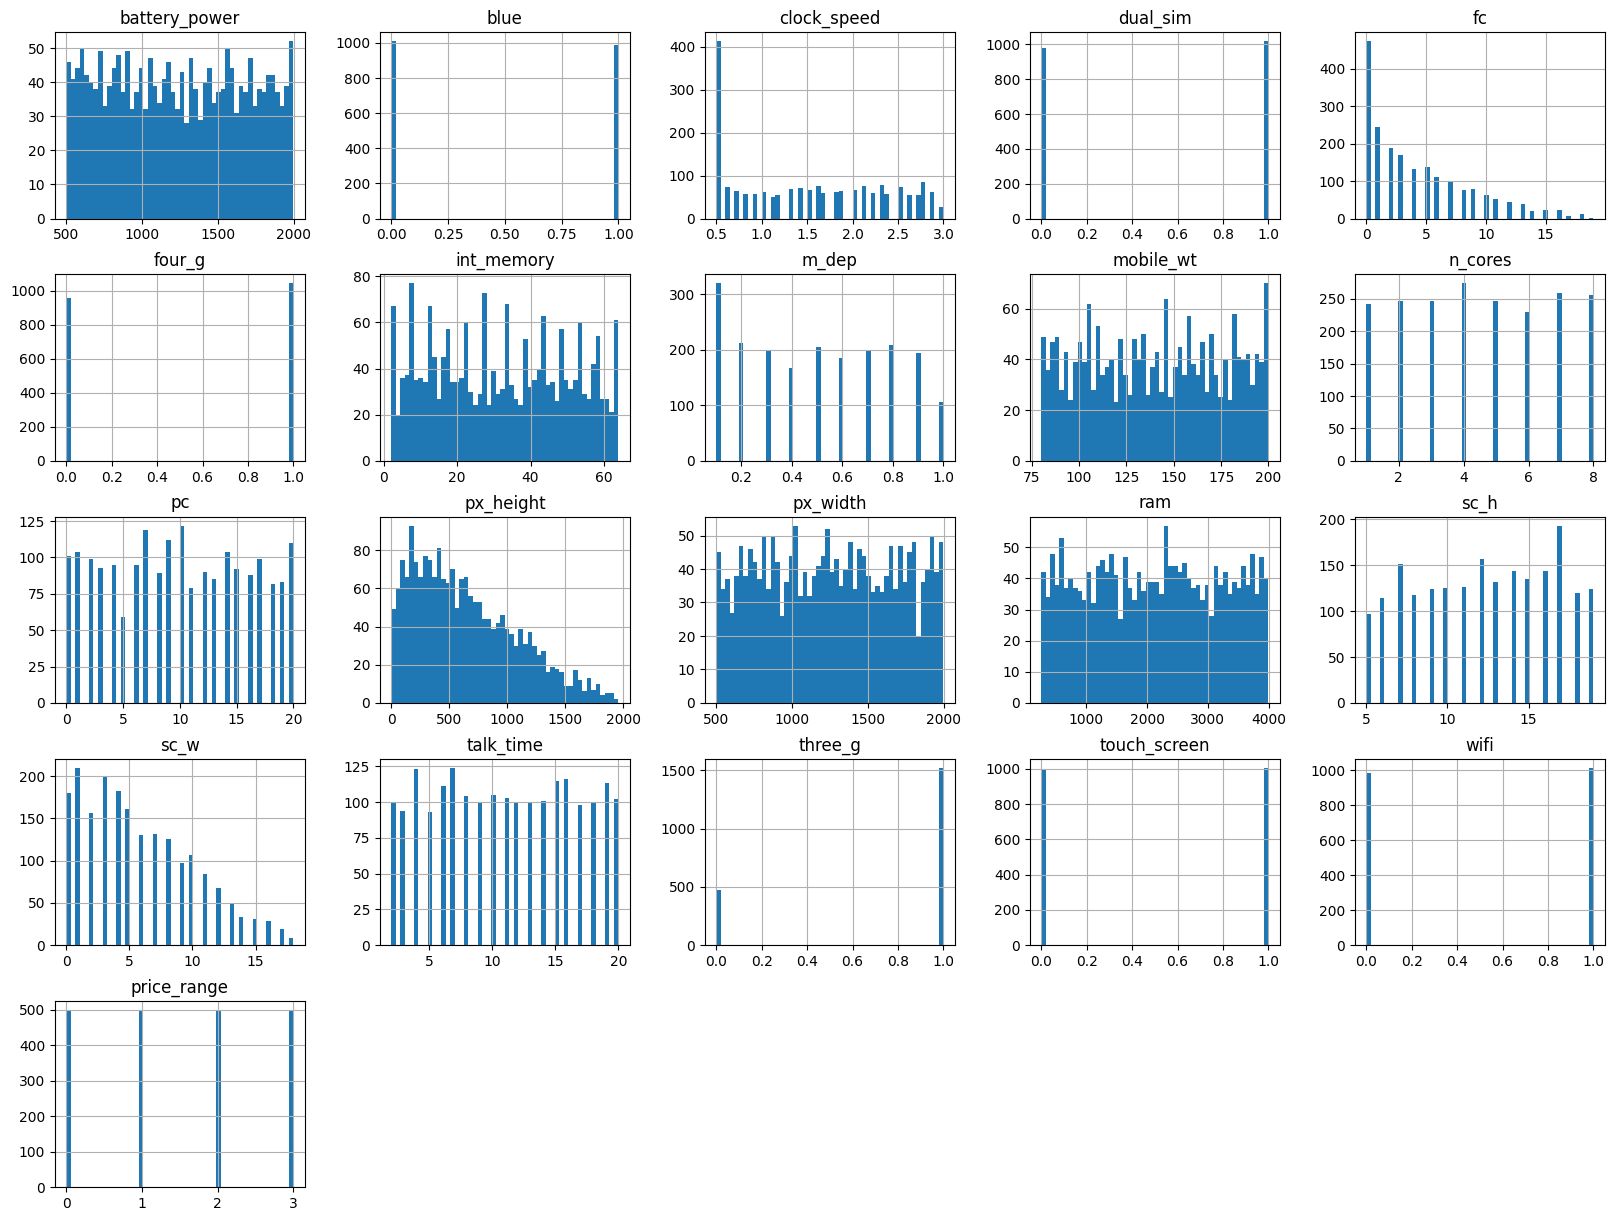

In [ ]:
#melihat histogram masing-masing fitur
df_train.hist(bins=50, figsize=(20,15))
plt.show()

##**Exploratory Data Analysis - Multivariate Analysis**

<ipython-input-26-10f9d71cf71f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price_range", kind="bar", data=df_train, height=4, aspect=3, palette="Set3")


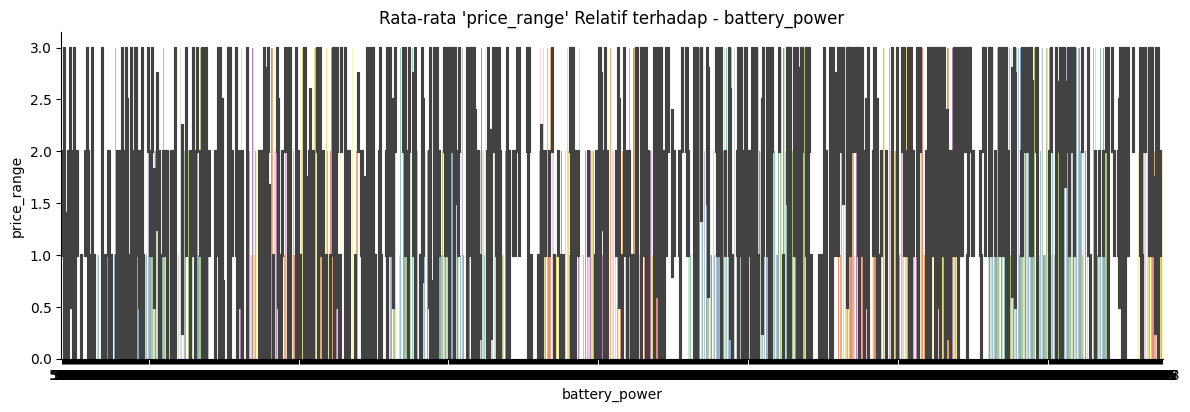

<ipython-input-26-10f9d71cf71f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price_range", kind="bar", data=df_train, height=4, aspect=3, palette="Set3")


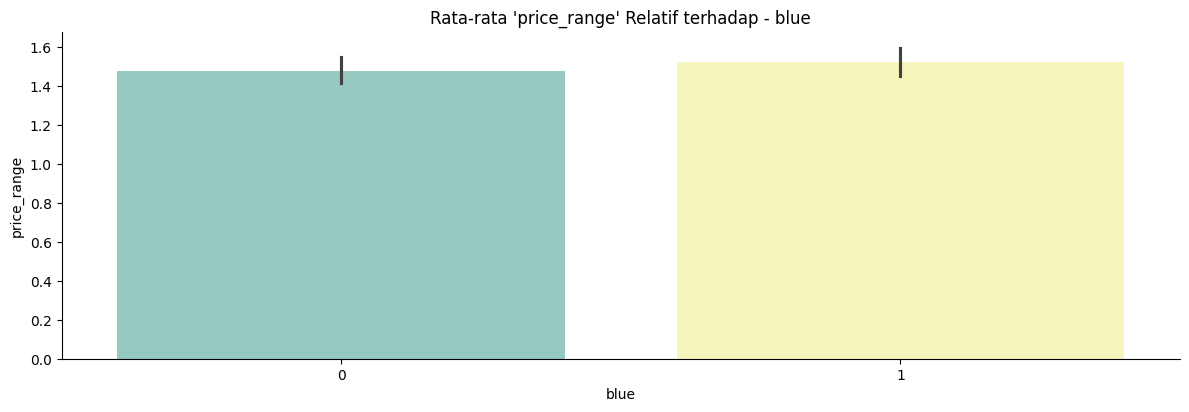

<ipython-input-26-10f9d71cf71f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price_range", kind="bar", data=df_train, height=4, aspect=3, palette="Set3")


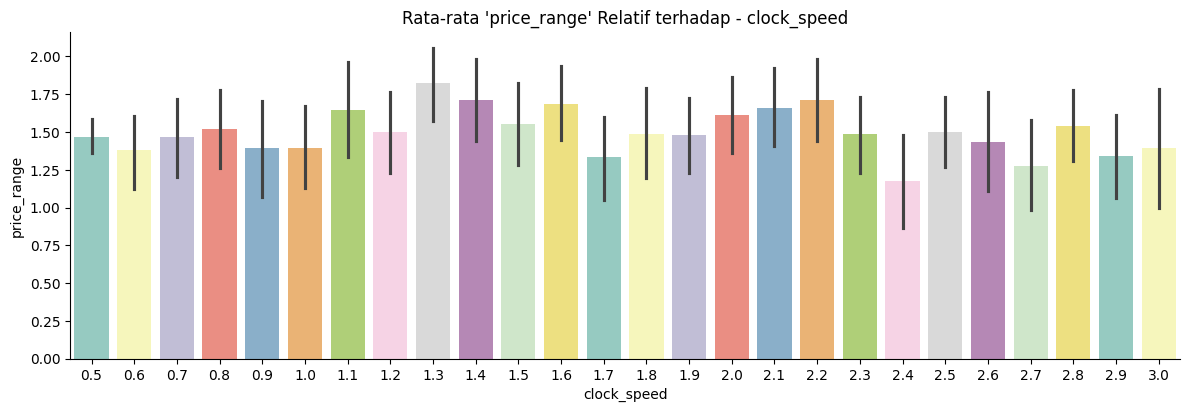

<ipython-input-26-10f9d71cf71f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price_range", kind="bar", data=df_train, height=4, aspect=3, palette="Set3")


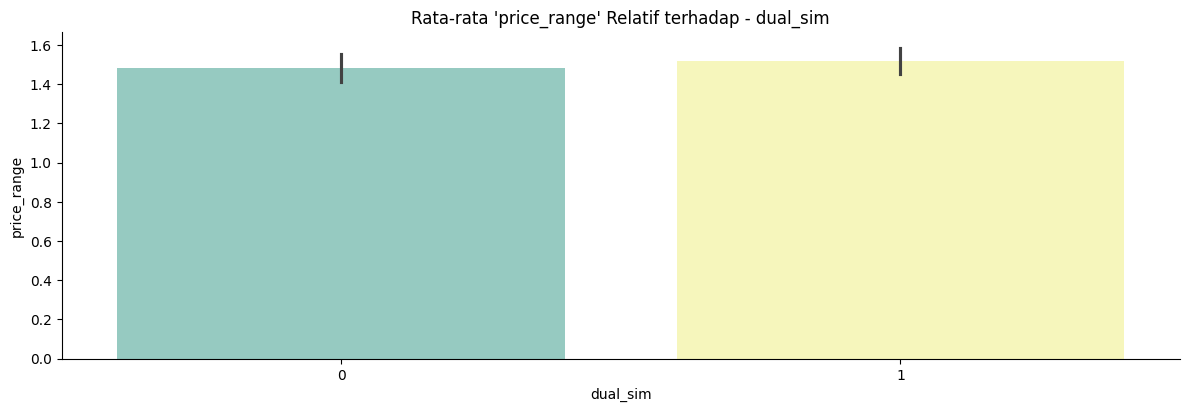

<ipython-input-26-10f9d71cf71f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price_range", kind="bar", data=df_train, height=4, aspect=3, palette="Set3")


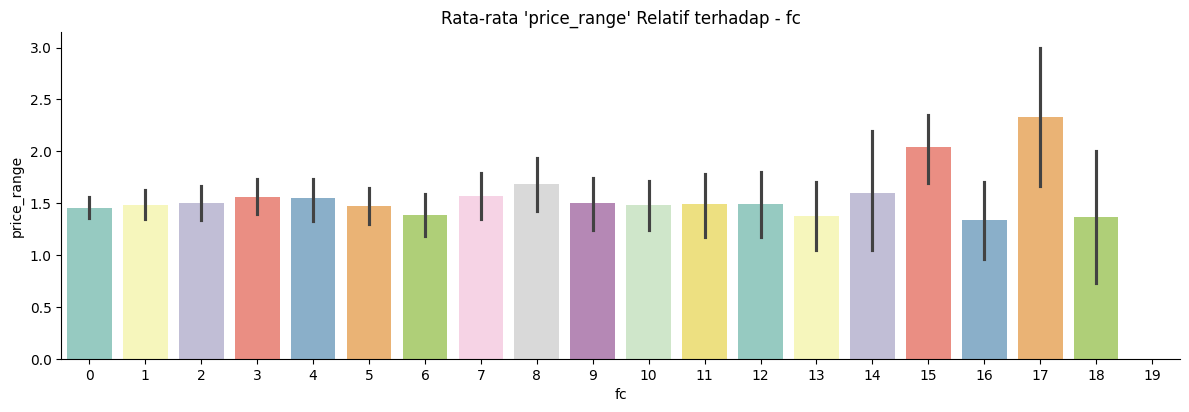

<ipython-input-26-10f9d71cf71f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price_range", kind="bar", data=df_train, height=4, aspect=3, palette="Set3")


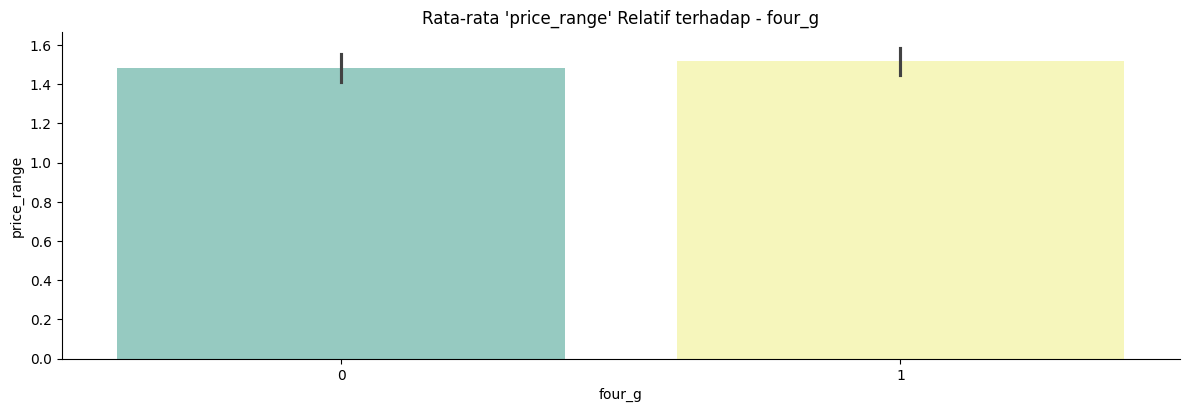

<ipython-input-26-10f9d71cf71f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price_range", kind="bar", data=df_train, height=4, aspect=3, palette="Set3")


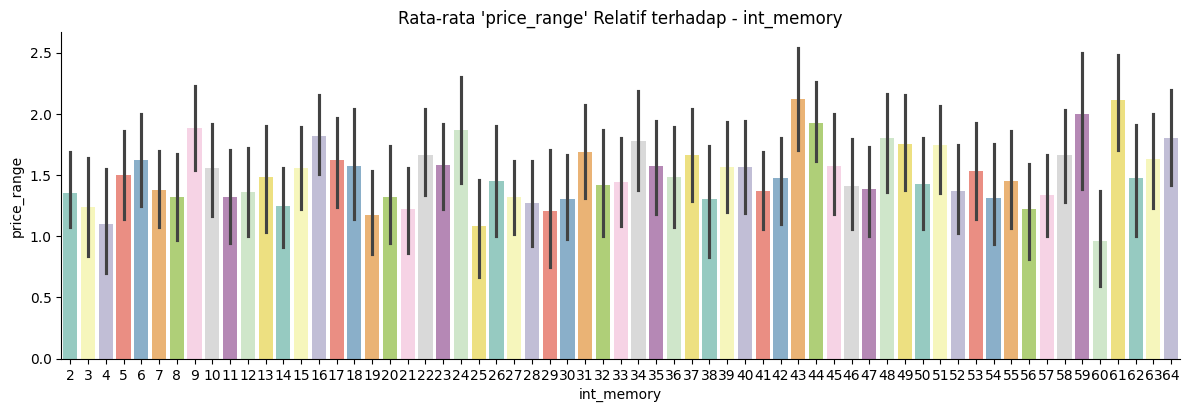

<ipython-input-26-10f9d71cf71f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price_range", kind="bar", data=df_train, height=4, aspect=3, palette="Set3")


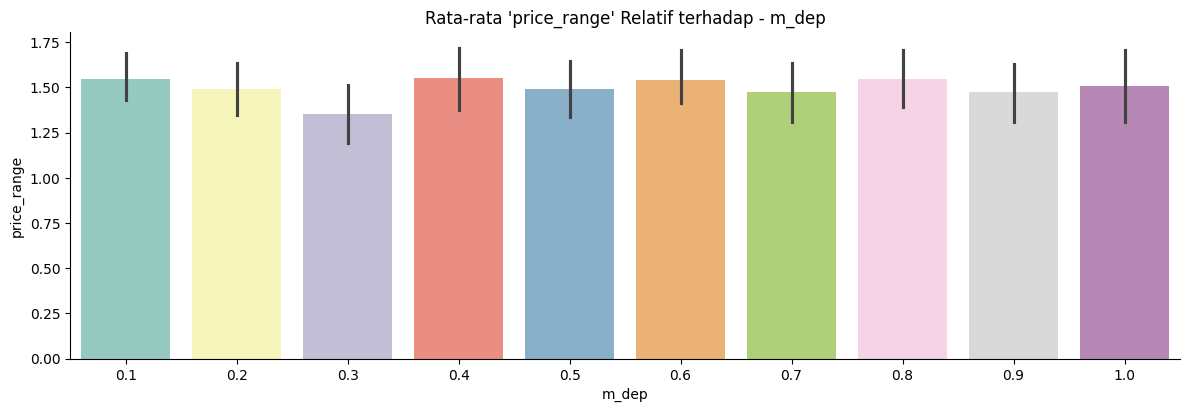

<ipython-input-26-10f9d71cf71f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price_range", kind="bar", data=df_train, height=4, aspect=3, palette="Set3")


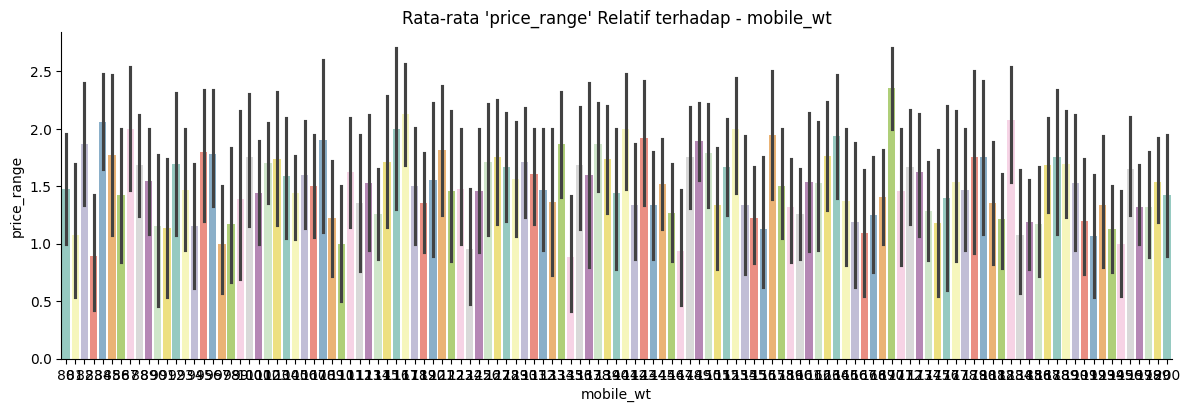

<ipython-input-26-10f9d71cf71f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price_range", kind="bar", data=df_train, height=4, aspect=3, palette="Set3")


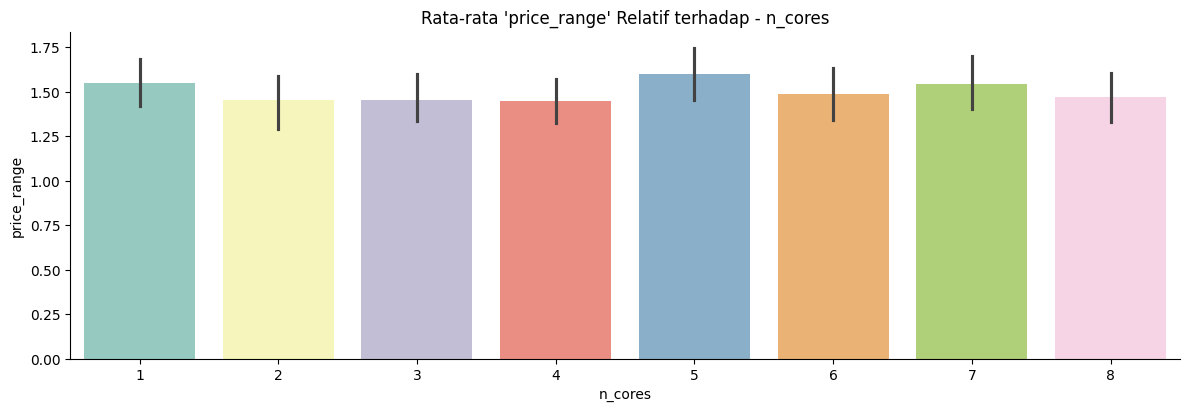

<ipython-input-26-10f9d71cf71f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price_range", kind="bar", data=df_train, height=4, aspect=3, palette="Set3")


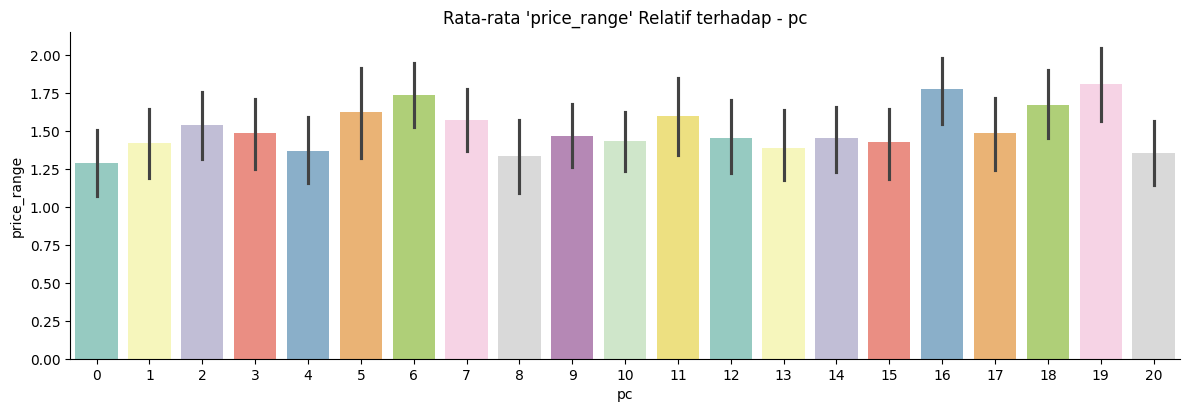

<ipython-input-26-10f9d71cf71f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price_range", kind="bar", data=df_train, height=4, aspect=3, palette="Set3")


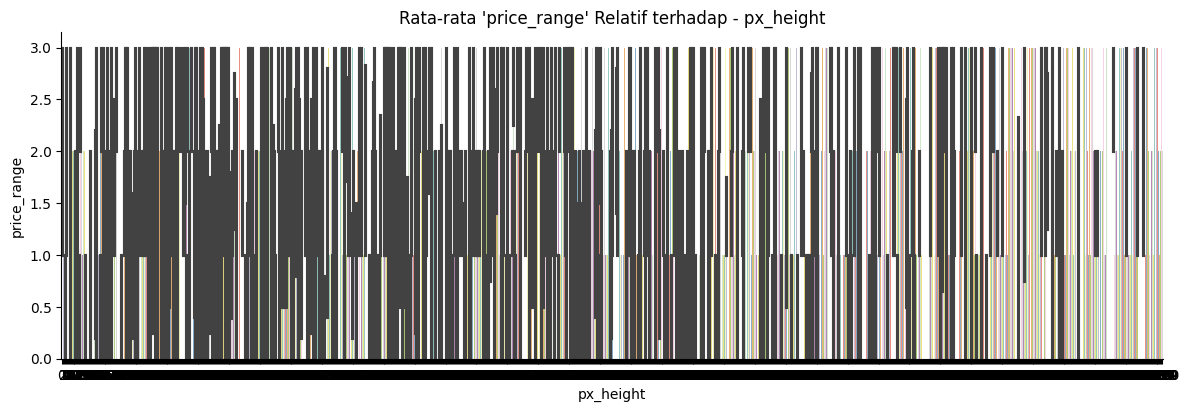

<ipython-input-26-10f9d71cf71f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price_range", kind="bar", data=df_train, height=4, aspect=3, palette="Set3")


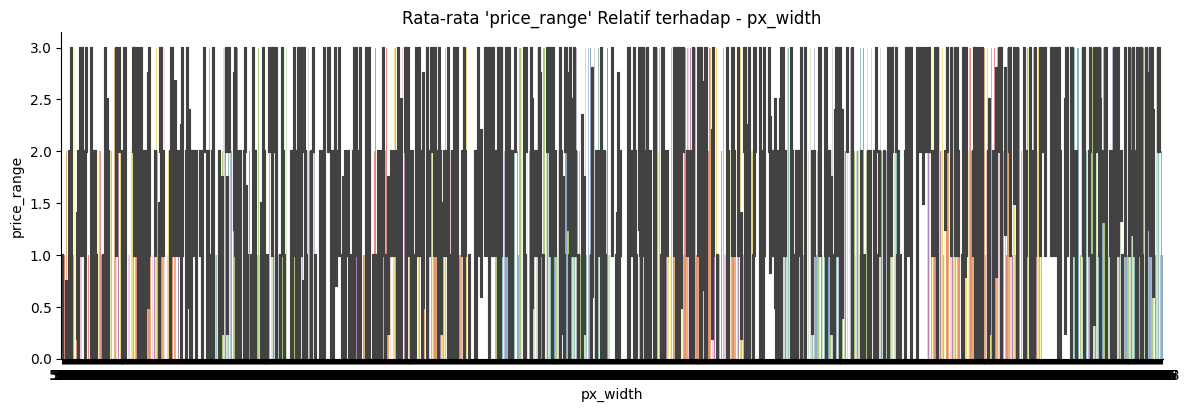

<ipython-input-26-10f9d71cf71f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price_range", kind="bar", data=df_train, height=4, aspect=3, palette="Set3")


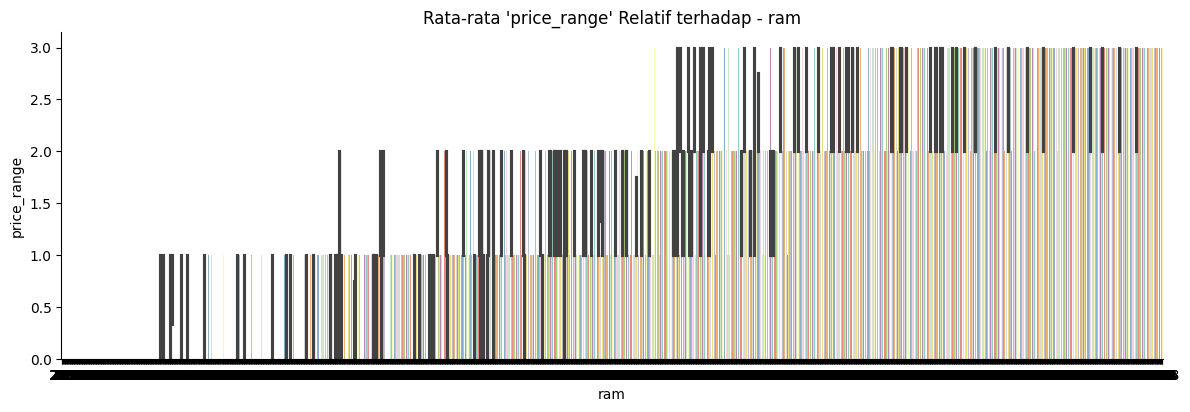

<ipython-input-26-10f9d71cf71f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price_range", kind="bar", data=df_train, height=4, aspect=3, palette="Set3")


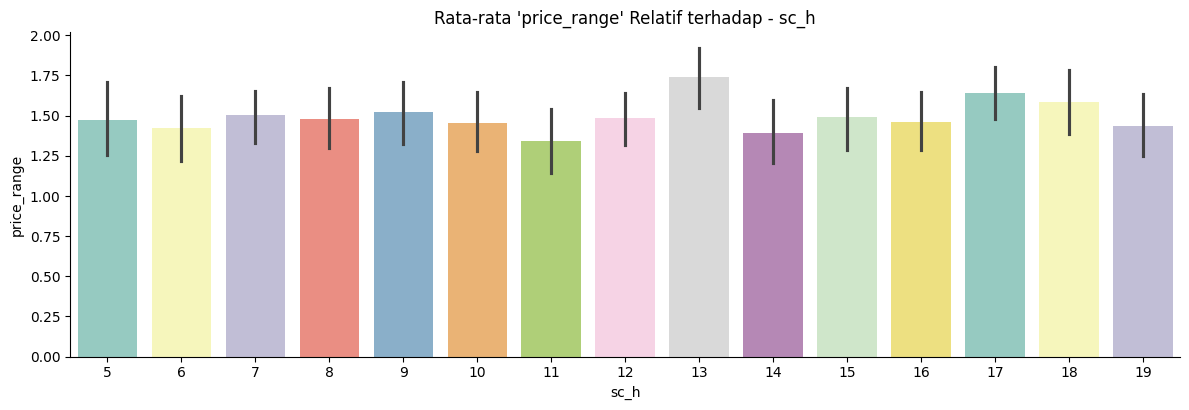

<ipython-input-26-10f9d71cf71f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price_range", kind="bar", data=df_train, height=4, aspect=3, palette="Set3")


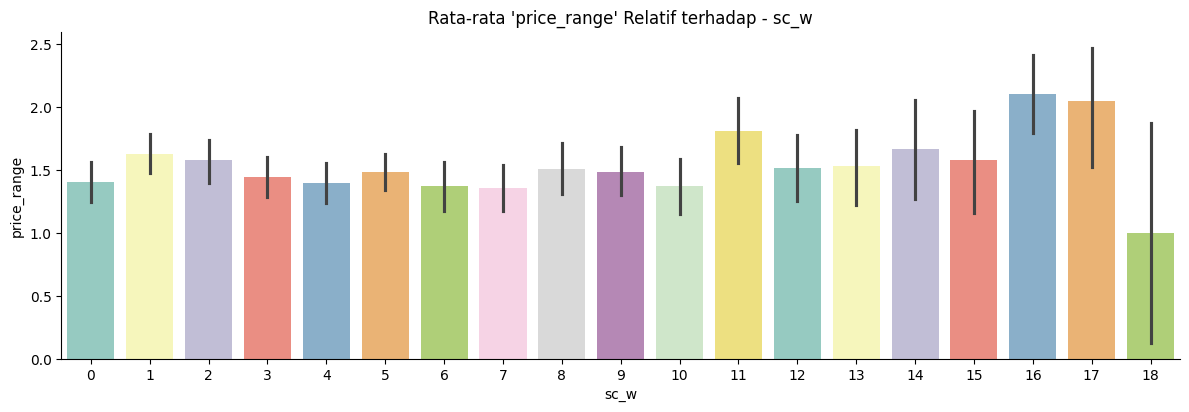

<ipython-input-26-10f9d71cf71f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price_range", kind="bar", data=df_train, height=4, aspect=3, palette="Set3")


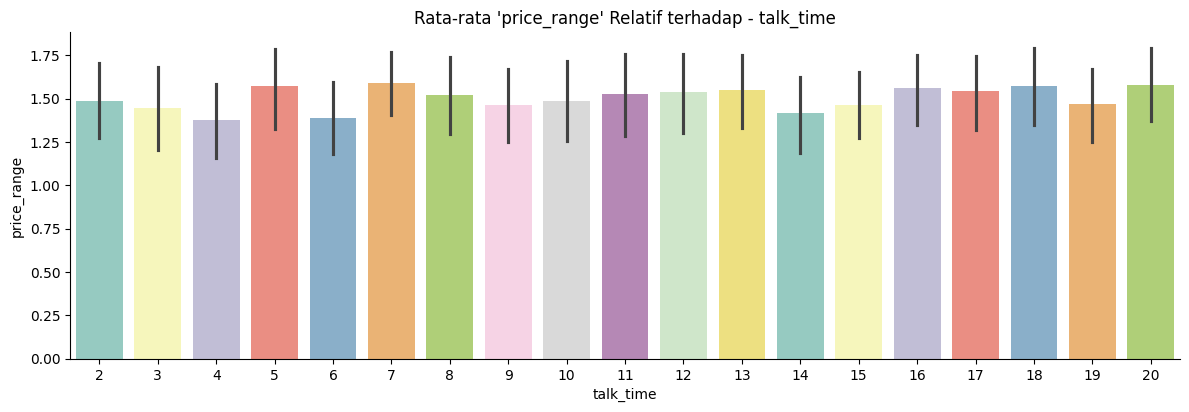

<ipython-input-26-10f9d71cf71f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price_range", kind="bar", data=df_train, height=4, aspect=3, palette="Set3")


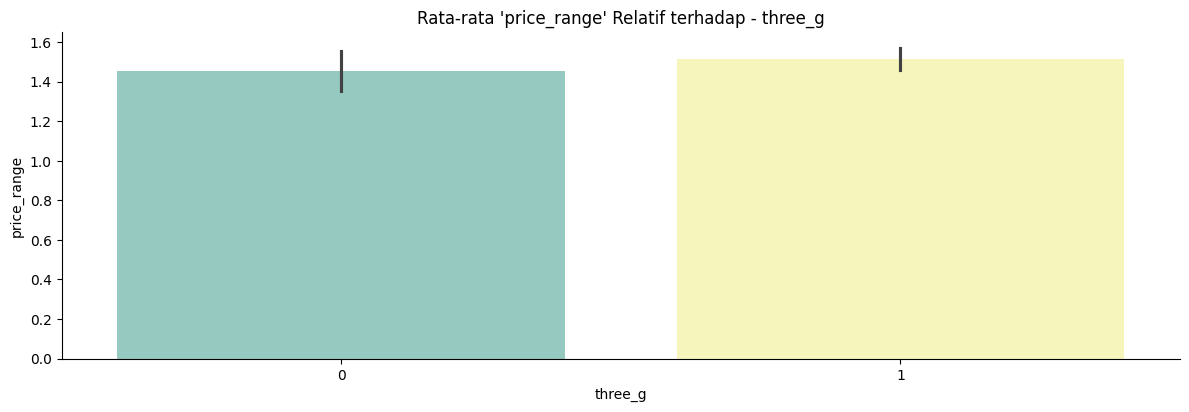

<ipython-input-26-10f9d71cf71f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price_range", kind="bar", data=df_train, height=4, aspect=3, palette="Set3")


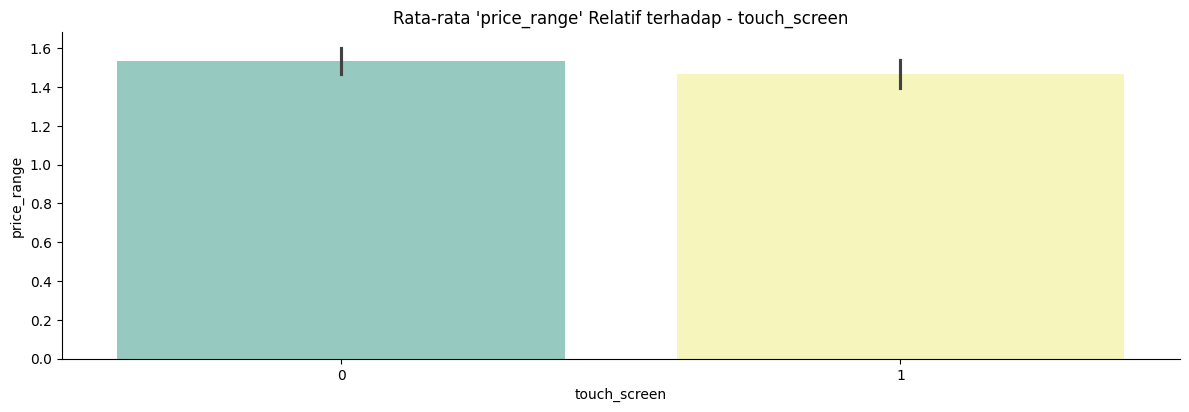

<ipython-input-26-10f9d71cf71f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price_range", kind="bar", data=df_train, height=4, aspect=3, palette="Set3")


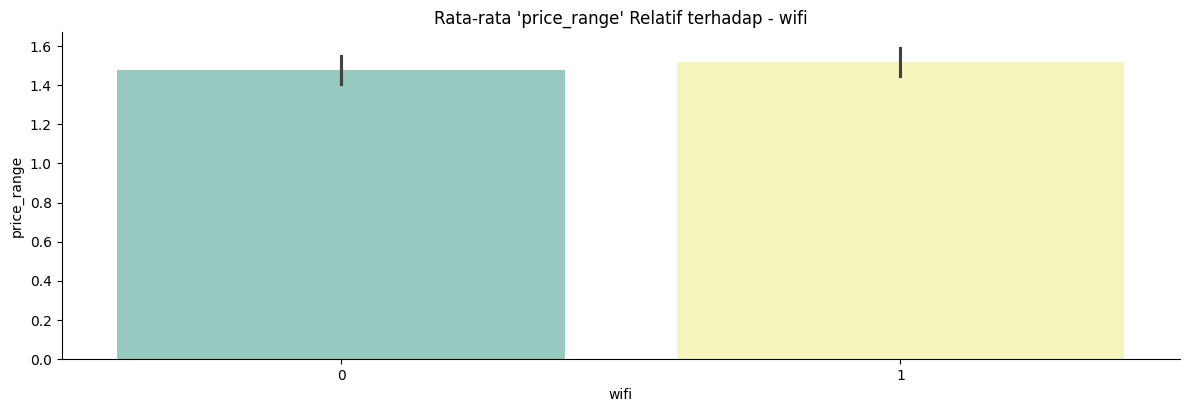

In [ ]:
# Pilih semua kolom numerik sebagai fitur
num_features = df_train.select_dtypes(include=np.number).columns.tolist()
num_features.remove('price_range') # Hapus price_range dari fitur karena merupakan target variabel

# Loop melalui setiap fitur dan buat catplot
for col in num_features:
  sns.catplot(x=col, y="price_range", kind="bar", data=df_train, height=4, aspect=3, palette="Set3")
  # Menampilkan estimator=np.mean untuk rata-rata
  plt.title(f"Rata-rata 'price_range' Relatif terhadap - {col}")
  plt.show()

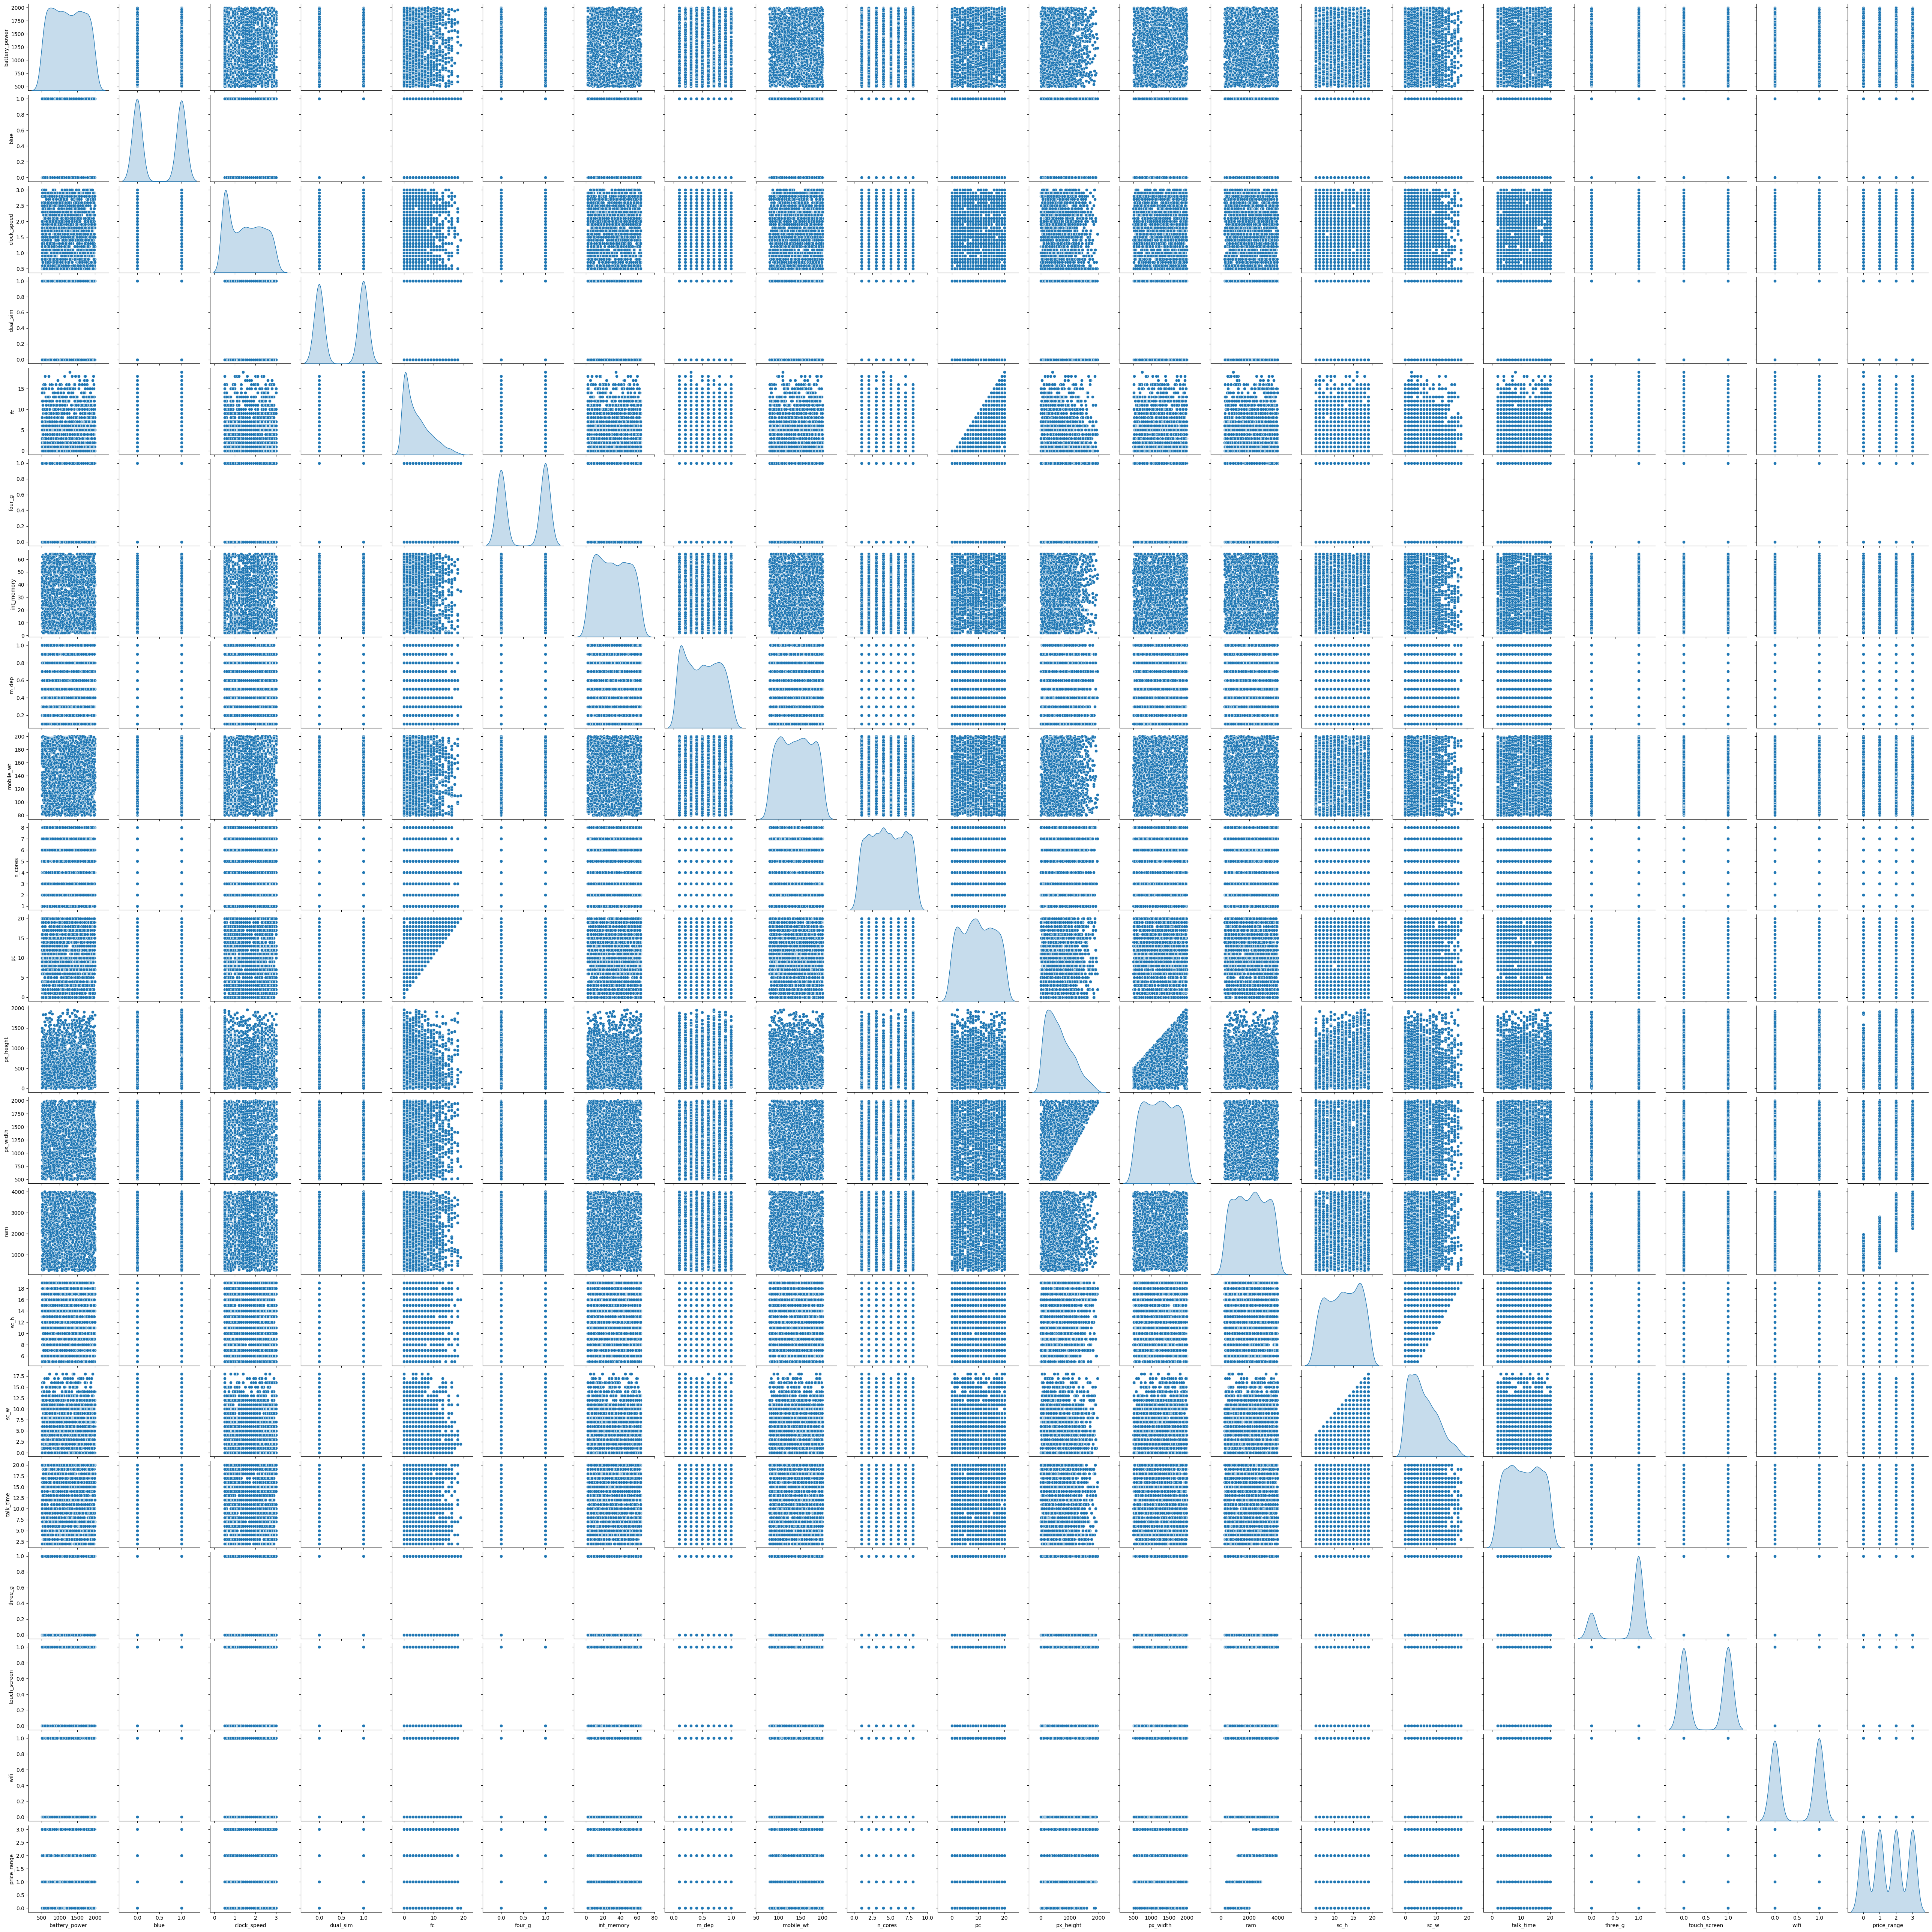

In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df_train, diag_kind = 'kde')

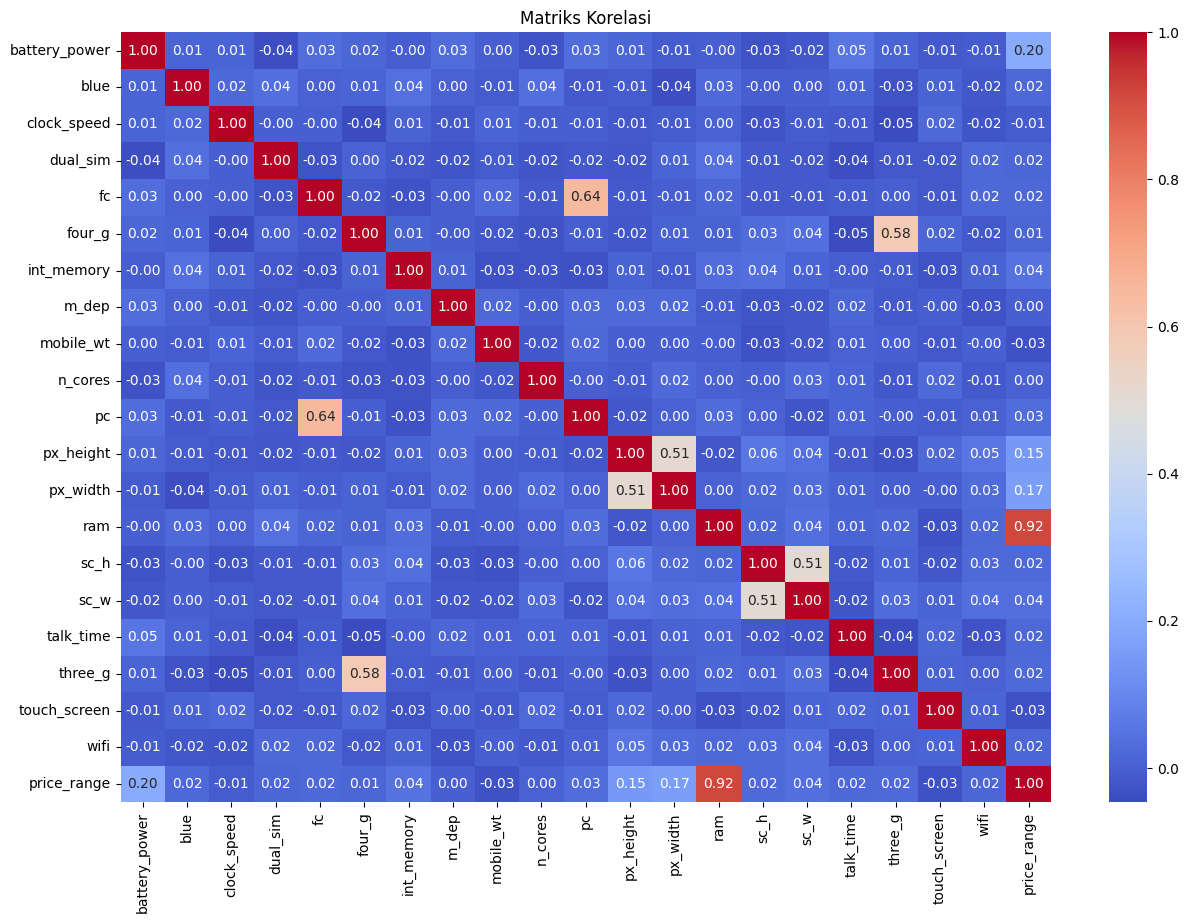

In [ ]:
#Melihat korelasi
# Menghitung matriks korelasi
correlation_matrix = df_train.corr()

# Membuat heatmap
plt.figure(figsize=(15, 10))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

Berdasarkan hasil korelasi diatas dapat diketahui variabel yang memiliki korelasi paling kuat adalah battery_power dan ram hal ini sangat dapat dipahami karena kebutuhan akan battery dan sangat berpengaruh terhadap kinerja HP, namun pada kolerasi diata terdapat variabel yang tidak memilki korelasi dengan price_range yaitu variabel n_cores, m_dep, dan clock_speed, sehingga kita dapat melakukan drop atau penghapusan pada tiga variabel tersebut.

##**Data Preparation**

Berdasarkan hasil korelasi diatas dapat diketahui bahwa terdapat variabel yang tidak memiliki korelasi dengan variabel label yaitu:
*   variabel n_cores, m_dep, dan clock_speed, sehingga saya akan melakukan drop atau penghapusan pada tiga variabel tersebut.



In [ ]:
#Menghapus fitur yang memiliki korelasi kecil yaitu fitur "n_cores, m_dep, dan clock_speed"
df_train = df_train.drop(['n_cores', 'm_dep', 'clock_speed'], axis=1)
df_train.head()

battery_power  blue  dual_sim  fc  four_g  int_memory  mobile_wt  pc  \
0            842     0         0   1       0           7        188   2   
1           1021     1         1   0       1          53        136   6   
2            563     1         1   2       1          41        145   6   
3            615     1         0   0       0          10        131   9   
4           1821     1         0  13       1          44        141  14   

   px_height  px_width   ram  sc_h  sc_w  talk_time  three_g  touch_screen  \
0         20       756  2549     9     7         19        0             0   
1        905      1988  2631    17     3          7        1             1   
2       1263      1716  2603    11     2          9        1             1   
3       1216      1786  2769    16     8         11        1             0   
4       1208      1212  1411     8     2         15        1             1   

   wifi  price_range  
0     1            1  
1     0            2  
2     0            2  
3     0            2  
4     0            1

Langkah selanjutnya melakukan pembagian data atau split data pada data train dengan perbandingan 80:20, kemudian melakukan standarisasi data.

In [ ]:
#pembagian data train sebesar 80:20
from sklearn.model_selection import train_test_split
X = df_train.drop(['price_range'], axis=1)
y = df_train['price_range']
from sklearn.model_selection import train_test_split

# Bagi dataset menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Cek jumlah data latih dan uji
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

Jumlah data latih: 1600
Jumlah data uji: 400


In [ ]:
#Melakukan standarisasi dengan StandardScaler pada data latih carat, table, dimension.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Menampilkan Hasil standarisasi dengan tabel
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled.head()

battery_power      blue  dual_sim        fc    four_g  int_memory  \
0       1.548360 -0.981423  0.970437  0.620111 -1.046060    0.754832   
1      -1.379535  1.018929 -1.030464 -0.993561  0.955968    0.919763   
2      -0.010914 -0.981423  0.970437 -0.532512  0.955968    1.359577   
3      -1.043621 -0.981423 -1.030464 -0.532512 -1.046060    0.315017   
4       0.488416  1.018929  0.970437  0.620111 -1.046060   -1.389265   

   mobile_wt        pc  px_height  px_width       ram      sc_h      sc_w  \
0   1.425710  0.020269   0.275712  1.181997 -0.580476 -0.528061  0.759509   
1  -0.046246 -1.476497  -0.258762 -0.556547  1.336453 -0.290196 -1.084869   
2   1.340790  0.685498  -0.285711 -1.020159 -0.657302  0.423400  1.451150   
3   1.623858 -0.478653  -0.764042  0.984962  1.288322  0.185535  0.528962   
4  -1.008680  0.352883   0.401470 -0.336332 -0.489767 -1.479523 -0.162680   

   talk_time   three_g  touch_screen      wifi  
0  -1.445123  0.557137      0.990050  1.002503  
1   0.915929  0.557137      0.990050  1.002503  
2   1.642407  0.557137     -1.010051  1.002503  
3  -1.081884 -1.794892     -1.010051  1.002503  
4   1.642407  0.557137     -1.010051  1.002503

##**Model Development**

Dalam melakukan pemodelan Mobile Price Klasifikasi saya memilih model klasifikasi karena variabel target berupa kalsifikasi rentang harga dengan 0 (biaya rendah), 1 (biaya sedang), 2 (biaya tinggi) dan 3 (biaya sangat tinggi).

Adapun model klasifikasi yang akan saya pilih adalah **Random Forest klasifikasi dan Support Vektor Machine** dengan melakukan optimasi pada kedua model tersebut menggunakan **Hyperparameter GridSearch.**

**1. Model Random Forest**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model dengan data latih
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

**Evaluasi Model Random Forest**

In [ ]:
# Prediksi pada data uji
y_pred_rf = model_rf.predict(X_test_scaled)

# Evaluasi model
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.85      0.87      0.86        91
           2       0.80      0.82      0.81        92
           3       0.93      0.88      0.91       112

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400

[[101   4   0   0]
 [  6  79   6   0]
 [  0  10  75   7]
 [  0   0  13  99]]


Dari hasil evaluasi diatas model random forest memiliki **hasil akurasi sebesar 89%.** hasil ini akan kita tingkatkan dengan optimasi menggunakan Hyperparameter GridSearch.

**Confusion Matrix.**

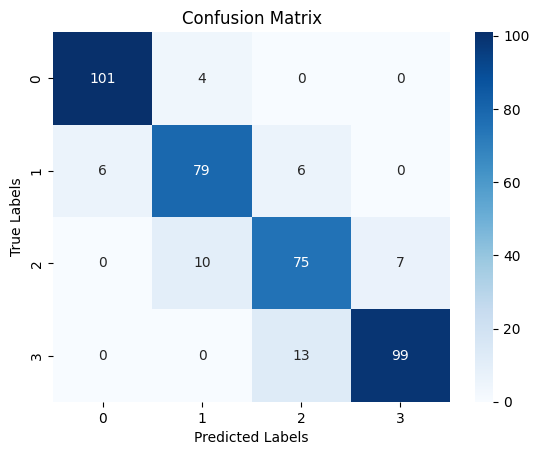

In [ ]:
#Melihat Confusion Matrix dengan warna cerah
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**2. Hyperparameter Model Random Forest dengan GridSearch**

Parameter yang digunakan untuk optimasi model random forest menggunakan GridSearch yaitu:

*   'n_estimators': [50, 100, 200]
*   'max_depth': [None, 10, 20, 30]
*   'min_samples_split': [2, 5, 10]

dari parameter diatas akan dicari nilai parameter terbaik menggunakan GridSearch untuk model klasifikasi random forest.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best parameters dan evaluasi ulang model
print(grid_search.best_params_)
y_pred_best_rf = grid_search.best_estimator_.predict(X_test_scaled)
print(classification_report(y_test, y_pred_best_rf))


{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.87      0.91      0.89        91
           2       0.84      0.84      0.84        92
           3       0.94      0.90      0.92       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400



**Hasil parameter terbaik dari Hyperparameter GridSearch yaitu:**

*   'max_depth': 20
*   'min_samples_split': 5
*   'n_estimators': 200

Dari hasil optimasi menggunakan Hyperparameter GridSearch dapat diketahui peningkatan dari **hasil akurasi sebesar 3% yaitu dari 89% menjadi 91%.** Peningkatan ini tejadi dari parameter terbaik yang dihasilkan.

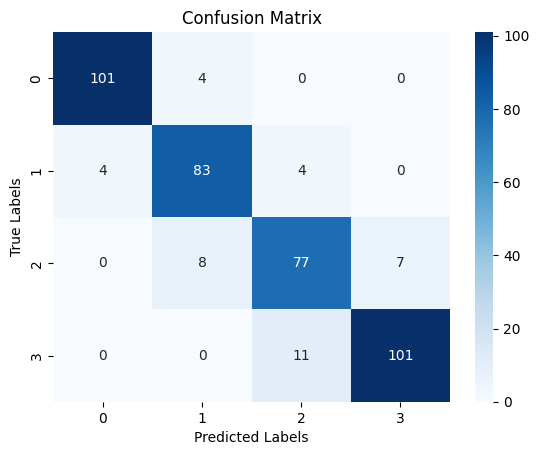

In [ ]:
#Melihat Confusion Matrix dengan warna cerah
cm = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**3. Model Support Vektor Machine**

In [ ]:
from sklearn.svm import SVC
# Inisialisasi model SVM
model_svm = SVC(kernel='rbf', random_state=42)

# Latih model
model_svm.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
# Prediksi data uji
from sklearn.metrics import accuracy_score, classification_report

y_pred_svm = model_svm.predict(X_test)

# Evaluasi performa model
print(f"Akurasi: {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))

Akurasi: 0.965
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       105
           1       0.95      0.99      0.97        91
           2       0.94      0.95      0.94        92
           3       0.98      0.95      0.96       112

    accuracy                           0.96       400
   macro avg       0.96      0.97      0.96       400
weighted avg       0.97      0.96      0.97       400



Dari hasil evaluasi diatas model SVM memiliki **hasil akurasi sebesar 96%.** hasil yang cukup tinggi dan melebihi nilai akurasi dari model random forest. Selanjutnya hasil ini akan kita tingkatkan dengan optimasi yang sama sebelumnya yaitu menggunakan Hyperparameter GridSearch.

**Confusion Matrix**

Text(50.722222222222214, 0.5, 'True Labels')

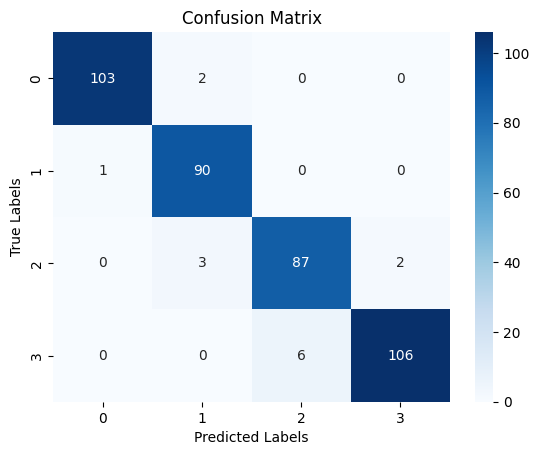

In [ ]:
#Confusion Matrix Model SVM
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

**4. Hyperparameter model Support Vektor Machine dengan GridSearch**

Parameter yang digunakan untuk optimasi model SVM menggunakan GridSearch yaitu:

*   'C': [0.1, 1, 10, 100]
*   'gamma': [1, 0.1, 0.01, 0.001]
*   'kernel': ['rbf', 'poly', 'sigmoid']
      
dari parameter diatas akan dicari nilai parameter terbaik menggunakan GridSearch untuk model klasifikasi SVM.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Tentukan parameter yang ingin di-tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Lakukan Grid Search dengan 5-fold cross-validation
grid = GridSearchCV(model_svm, param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

# Cetak parameter terbaik yang ditemukan oleh GridSearchCV
print("Best Hyperparameters:", grid.best_params_)

# Prediksi dengan model terbaik
y_pred_SVM = grid.predict(X_test)

# Evaluasi hasil prediksi
print(f"Akurasi: {accuracy_score(y_test, y_pred_SVM)}")
print(classification_report(y_test, y_pred_SVM))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, k

**Hasil parameter terbaik dari Hyperparameter GridSearch yaitu:**

*   'C': 0.1
*   'gamma': 1
*   'kernel': 'poly'

Dari hasil optimasi menggunakan Hyperparameter GridSearch dapat diketahui peningkatan dari **hasil akurasi sebesar 1% yaitu dari 96% menjadi 97%.** Peningkatan ini tejadi dari parameter terbaik yang dihasilkan.

**Confusion Matrix Hyperparameter SVM**

Text(50.722222222222214, 0.5, 'True Labels')

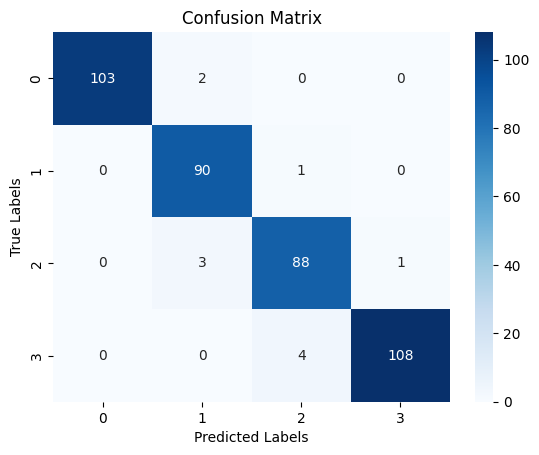

In [ ]:
#Confusion Matrix Hyperparameter SVM
cm = confusion_matrix(y_test, y_pred_SVM)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

**Visualisasi Hasil Evaluasi**

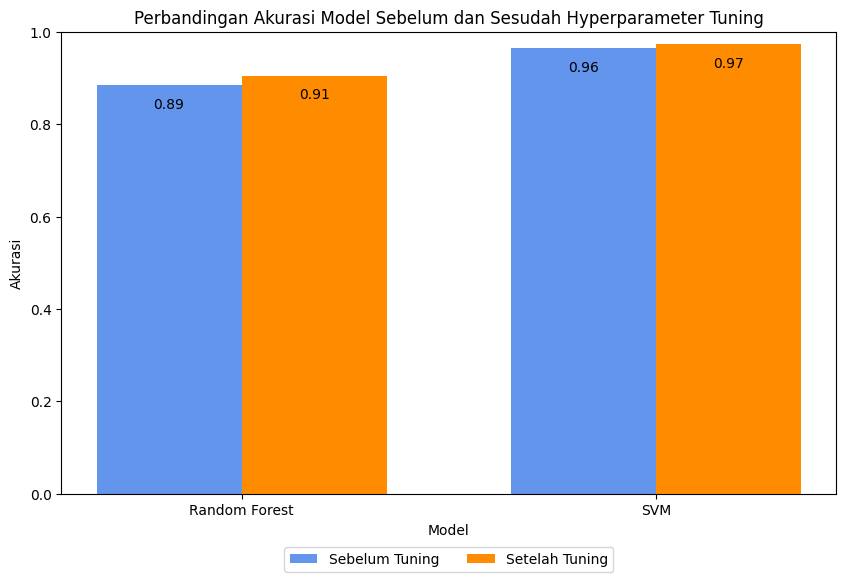

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Akurasi sebelum hyperparameter tuning
accuracy_rf_before = accuracy_score(y_test, y_pred_rf)
accuracy_svm_before = accuracy_score(y_test, y_pred_svm)

# Akurasi setelah hyperparameter tuning
accuracy_rf_after = accuracy_score(y_test, y_pred_best_rf)
accuracy_svm_after = accuracy_score(y_test, y_pred_SVM)

# Data untuk visualisasi
model_names = ['Random Forest', 'SVM']
accuracies_before = [accuracy_rf_before, accuracy_svm_before]
accuracies_after = [accuracy_rf_after, accuracy_svm_after]

# Buat bar chart
bar_width = 0.35
index = np.arange(len(model_names))

plt.figure(figsize=(10, 6))
plt.bar(index, accuracies_before, bar_width, label='Sebelum Tuning', color=['cornflowerblue', 'cornflowerblue'])
plt.bar(index + bar_width, accuracies_after, bar_width, label='Setelah Tuning', color=['darkorange', 'darkorange'])

plt.title('Perbandingan Akurasi Model Sebelum dan Sesudah Hyperparameter Tuning')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.xticks(index + bar_width / 2, model_names)
plt.ylim([0, 1])

# Menampilkan nilai akurasi di atas bar dan di bawah diagram
for i, v in enumerate(accuracies_before):
    plt.text(i, v - 0.05, str(round(v, 2)), ha='center', color='black') # Menampilkan di bawah
for i, v in enumerate(accuracies_after):
    plt.text(i + bar_width, v - 0.05, str(round(v, 2)), ha='center', color='black') # Menampilkan di bawah

# Menampilkan keterangan di bawah
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2) # Pindahkan keterangan ke bawah

plt.show()

**Prediksi Data test menggunakan Model SVM**

In [ ]:
#Menghapus fitur yang memiliki korelasi kecil yaitu fitur "n_cores, m_dep, dan clock_speed"
df_test = df_test.drop(['id', 'n_cores', 'm_dep', 'clock_speed'], axis=1)
df_test.head()

battery_power  blue  dual_sim  fc  four_g  int_memory  mobile_wt  pc  \
0           1043     1         1  14       0           5        193  16   
1            841     1         1   4       1          61        191  12   
2           1807     1         0   1       0          27        186   4   
3           1546     0         1  18       1          25         96  20   
4           1434     0         0  11       1          49        108  18   

   px_height  px_width   ram  sc_h  sc_w  talk_time  three_g  touch_screen  \
0        226      1412  3476    12     7          2        0             1   
1        746       857  3895     6     0          7        1             0   
2       1270      1366  2396    17    10         10        0             1   
3        295      1752  3893    10     0          7        1             1   
4        749       810  1773    15     8          7        1             0   

   wifi  
0     0  
1     0  
2     1  
3     0  
4     1

In [ ]:
# Buat model SVM
model_prediksi = SVC(kernel='poly', C=0.1, gamma=1)

# Latih model pada data latih
model_prediksi.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_prediksi = model_prediksi.predict(df_test)

# Buat DataFrame dari hasil prediksi
predictions_df = pd.DataFrame(y_prediksi, columns=['price_range'])

# Simpan prediksi ke file CSV
predictions_df.to_csv('/content/drive/MyDrive/Machine Learning/Latihan Dicoding ML/svm_predictions.csv', index=False)
print("Prediksi telah selesai dan disimpan dalam 'svm_predictions.csv'")

Prediksi telah selesai dan disimpan dalam 'svm_predictions.csv'


In [ ]:
#Memanggil data yang sudah diprediksi
prediksi = pd.read_csv('/content/drive/MyDrive/Machine Learning/Latihan Dicoding ML/svm_predictions.csv')
prediksi.head()

price_range
0            3
1            3
2            2
3            3
4            1

In [ ]:
# Gabungkan kolom 'price_range' dari hasil prediksi ke DataFrame df_test
df_test['price_range'] = y_prediksi

     battery_power  blue  dual_sim  fc  four_g  int_memory  mobile_wt  pc  \
0             1043     1         1  14       0           5        193  16   
1              841     1         1   4       1          61        191  12   
2             1807     1         0   1       0          27        186   4   
3             1546     0         1  18       1          25         96  20   
4             1434     0         0  11       1          49        108  18   
..             ...   ...       ...  ..     ...         ...        ...  ..   
995           1700     1         0   0       1          54        170  17   
996            609     0         1   0       0          13        186   2   
997           1185     0         0   1       1           8         80  12   
998           1533     1         1   0       0          50        171  12   
999           1270     1         0   4       1          35        140  19   

     px_height  px_width   ram  sc_h  sc_w  talk_time  three_g  touch_scree

battery_power  blue  dual_sim  fc  four_g  int_memory  mobile_wt  pc  \
0             1043     1         1  14       0           5        193  16   
1              841     1         1   4       1          61        191  12   
2             1807     1         0   1       0          27        186   4   
3             1546     0         1  18       1          25         96  20   
4             1434     0         0  11       1          49        108  18   
..             ...   ...       ...  ..     ...         ...        ...  ..   
995           1700     1         0   0       1          54        170  17   
996            609     0         1   0       0          13        186   2   
997           1185     0         0   1       1           8         80  12   
998           1533     1         1   0       0          50        171  12   
999           1270     1         0   4       1          35        140  19   

     px_height  px_width   ram  sc_h  sc_w  talk_time  three_g  touch_screen  \
0          226      1412  3476    12     7          2        0             1   
1          746       857  3895     6     0          7        1             0   
2         1270      1366  2396    17    10         10        0             1   
3          295      1752  3893    10     0          7        1             1   
4          749       810  1773    15     8          7        1             0   
..         ...       ...   ...   ...   ...        ...      ...           ...   
995        644       913  2121    14     8         15        1             1   
996       1152      1632  1933     8     1         19        0             1   
997        477       825  1223     5     0         14        1             0   
998         38       832  2509    15    11          6        0             1   
999        457       608  2828     9     2          3        1             0   

     wifi  price_range  
0       0            3  
1       0            3  
2       1            2  
3       0            3  
4       1            1  
..    ...          ...  
995     0            2  
996     1            1  
997     0            0  
998     0            2  
999     1            2  

[1000 rows x 18 columns]

In [ ]:
# Atau, jika ingin melihat dalam bentuk tabel interaktif:
df_test.head()

battery_power  blue  dual_sim  fc  four_g  int_memory  mobile_wt  pc  \
0           1043     1         1  14       0           5        193  16   
1            841     1         1   4       1          61        191  12   
2           1807     1         0   1       0          27        186   4   
3           1546     0         1  18       1          25         96  20   
4           1434     0         0  11       1          49        108  18   

   px_height  px_width   ram  sc_h  sc_w  talk_time  three_g  touch_screen  \
0        226      1412  3476    12     7          2        0             1   
1        746       857  3895     6     0          7        1             0   
2       1270      1366  2396    17    10         10        0             1   
3        295      1752  3893    10     0          7        1             1   
4        749       810  1773    15     8          7        1             0   

   wifi  price_range  
0     0            3  
1     0            3  
2     1            2  
3     0            3  
4     1            1